In [0]:
# 1. Load the cars dataset.

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
df = pd.read_csv("autos_small.csv")
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [2]:
df.isnull().any() 

price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [3]:
df.tail()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,NaN,101,astra,150000,NaN,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen
9999,7990,Renault_Megane_1.6_16V_100_Authentique,2012,4,manuell,101,megane,60000,benzin,renault,limousine


In [4]:
df.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                10000 non-null  int64 
 1   name                 10000 non-null  object
 2   yearOfRegistration   10000 non-null  int64 
 3   monthOfRegistration  10000 non-null  int64 
 4   gearbox              9423 non-null   object
 5   powerPS              10000 non-null  int64 
 6   model                9433 non-null   object
 7   kilometer            10000 non-null  int64 
 8   fuelType             9057 non-null   object
 9   brand                10000 non-null  object
 10  vehicleType          8950 non-null   object
dtypes: int64(5), object(6)
memory usage: 625.1+ KB


In [6]:
df.shape

(10000, 11)

In [8]:
df['price'].value_counts()

0        308
1500     158
500      150
1200     128
1000     124
        ... 
7880       1
34499      1
28350      1
7840       1
18399      1
Name: price, Length: 1215, dtype: int64

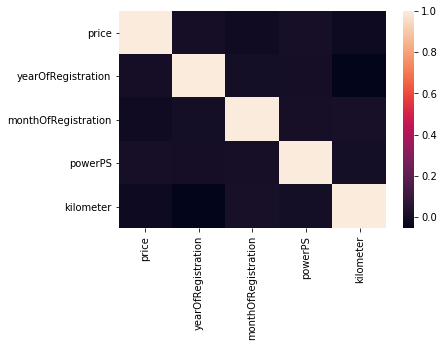

In [9]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df.corr())

In [0]:
# 2. Figure out the best strategy to fill missing values

In [22]:
df.dropna(axis=1)

,price,name,yearOfRegistration,monthOfRegistration,powerPS,kilometer,brand
0,400,Ford_Escort,1992,8,89,60000,ford
1,3500,Bmw_320_cabrio,1996,0,150,125000,bmw
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,150,150000,mercedes_benz
3,4000,A3_Limousine,2006,7,0,150000,audi
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,41,150000,smart
...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,80,150000,opel
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,140,150000,volkswagen
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,101,150000,opel
9998,970,Renault_Twingo,2002,10,58,150000,renault


In [23]:
df.dropna()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine
...,...,...,...,...,...,...,...,...,...,...,...
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,2005,12,manuell,90,golf,150000,diesel,volkswagen,bus
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [24]:
X = df.iloc[:, :1].values
X[:5]

y = df.iloc[:, -1].values
y[:5]


array(['kombi', 'cabrio', 'kombi', 'limousine', 'cabrio'], dtype=object)

In [25]:
df.isnull().any()

price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [26]:
df.fillna(df.mean(), inplace = True)
df.isnull().any() 

price                  False
name                   False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

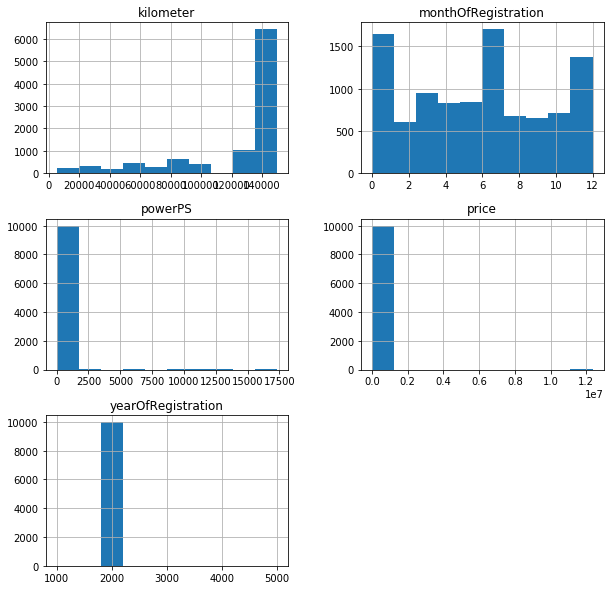

In [27]:
df.isnull().any()
df.hist(figsize = (10,10));

In [28]:
 df.isnull().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [0]:
# 3. Complete any other preprocessing required.

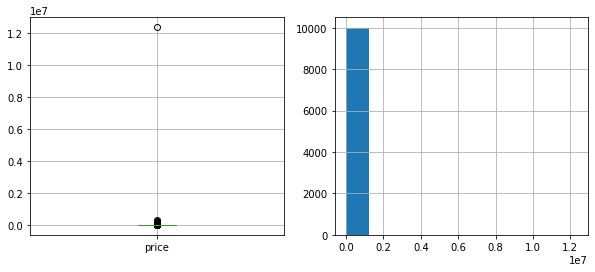

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
df['price'].median()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,4))
df.boxplot('price', ax = ax1)
df['price'].hist(ax = ax2)

In [31]:
df['price'] = df['price'].fillna(df['price'].median())
df['yearOfRegistration'].isnull().sum()
df['yearOfRegistration'] = np.where(df['yearOfRegistration'].notnull(), 1, 0)
df['kilometer'].value_counts()
df['kilometer'] = df['kilometer'].fillna('S')
df['kilometer'] = df['kilometer'].map({'S': 0, 'C' : 1, 'Q' : 2})
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1,8,manuell,89,escort,0,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1,0,manuell,150,3er,0,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1,0,manuell,150,c_klasse,0,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,1,7,manuell,0,a3,0,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,1,7,automatik,41,fortwo,0,diesel,smart,cabrio


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['yearOfRegistration'] = le.fit_transform(df['yearOfRegistration'])
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,0,8,manuell,89,escort,0,benzin,ford,kombi
1,3500,Bmw_320_cabrio,0,0,manuell,150,3er,0,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,0,0,manuell,150,c_klasse,0,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,0,7,manuell,0,a3,0,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,0,7,automatik,41,fortwo,0,diesel,smart,cabrio


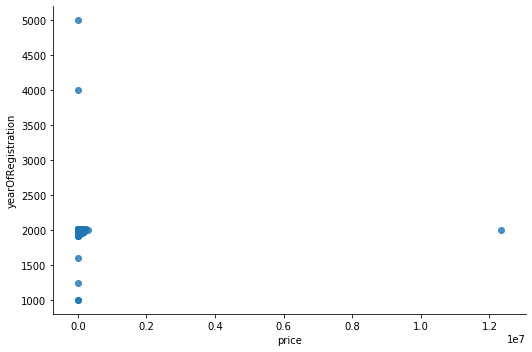

In [33]:
autos_small = pd.read_csv("autos_small.csv")
sns.lmplot(data = autos_small, x = 'price', y = 'yearOfRegistration', fit_reg = False, aspect=1.5)

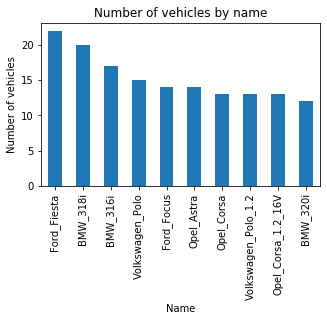

In [90]:
df.name.value_counts().nlargest(10).plot(kind='bar', figsize=(5,3))
plt.title("Number of vehicles by name")
plt.ylabel('Number of vehicles')
plt.xlabel('Name');

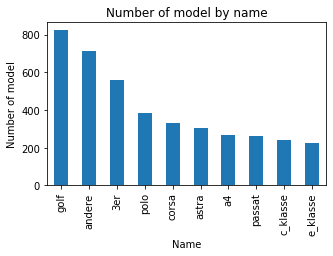

In [92]:
df.model.value_counts().nlargest(10).plot(kind='bar', figsize=(5,3))
plt.title("Number of model by name")
plt.ylabel('Number of model')
plt.xlabel('Name');

In [34]:
# 4. Apply various regression models and find out which model is the best for this dataset

In [35]:
data1 = pd.read_csv("autos_small.csv")
data1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,NaN,101,astra,150000,NaN,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [36]:
data1.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [37]:
cat_cols = ['model', 'vehicleType', 'brand', 'gearbox', 'fuelType', 'name']

data1 = pd.get_dummies(data1, columns = cat_cols, drop_first=True)
data1.head()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,model_145,model_147,model_156,model_159,model_1_reihe,...,name_volkswagen_lt_28,name_vw_golf_1_4_4_tuerer,name_vw_polo_6N_servolenkung_50_ps_tuev:10/17kostet:_980_euro,name_vw_sharan_1.9_tdi_auf_polnisch_kennzeichen_mit_7_zitze,name_wegen_Firmen_Ausloesung_alte_Firmen_Fahrzeuge,name_zafira_2.0_dti,name_zu_Verkaufen_Skoda_Fabia_Kombi_1_4l_16v,name_zuverlaessigen_Skoda_Oktavia__Erste_Hand!,name_zuverlaessiger_Ford_Focus_Turnier_Futura_Kombi_1.8_l,name_zuverlaessiges_Anfaengerauto_mit_Automatic_und_Standheizung
0,400,1992,8,89,60000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500,1996,0,150,125000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200,1998,0,150,150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,2006,7,0,150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2600,2002,7,41,150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df1 = data1.head()
df1

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,model_145,model_147,model_156,model_159,model_1_reihe,...,name_volkswagen_lt_28,name_vw_golf_1_4_4_tuerer,name_vw_polo_6N_servolenkung_50_ps_tuev:10/17kostet:_980_euro,name_vw_sharan_1.9_tdi_auf_polnisch_kennzeichen_mit_7_zitze,name_wegen_Firmen_Ausloesung_alte_Firmen_Fahrzeuge,name_zafira_2.0_dti,name_zu_Verkaufen_Skoda_Fabia_Kombi_1_4l_16v,name_zuverlaessigen_Skoda_Oktavia__Erste_Hand!,name_zuverlaessiger_Ford_Focus_Turnier_Futura_Kombi_1.8_l,name_zuverlaessiges_Anfaengerauto_mit_Automatic_und_Standheizung
0,400,1992,8,89,60000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500,1996,0,150,125000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200,1998,0,150,150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,2006,7,0,150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2600,2002,7,41,150000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Linear regression
# splitting data
# set the test_size for splitting the total data
X = data1.iloc[:, 1:23].values
y = data1.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# create the model
from sklearn.linear_model import LinearRegression
multi_lr_model = LinearRegression()
lr = LinearRegression()

# fit the model with X and y

multi_lr_model.fit(X_train, y_train)

X_test = np.array(X_test)

# get predictions
y_pred = multi_lr_model.predict(X_test)

In [56]:

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(multi_lr_model.coef_)-1)*(1 - r2)

rmse, r2, adj_r2,multi_lr_model.coef_, multi_lr_model.intercept_

(9993.686114992215,
 0.028633877868062374,
 0.02649194595597426,
 array([ 1.49676460e+01, -5.28761613e+02,  2.63953898e+00, -5.62763066e-02,
        -6.62580843e+03, -4.35038097e+03, -4.66573731e+03,  3.39803854e+03,
        -6.60517989e+03,  3.48487388e+03, -1.11452121e+03, -4.17530959e+03,
        -3.43016996e+03, -5.75156374e+02, -2.12543605e+03, -2.77485446e+03,
        -4.93561035e+01,  9.63782265e+02, -9.49978124e+03, -1.55044569e+03,
         1.62327806e+04,  2.62121402e+03]),
 -12644.47297043203)

In [66]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

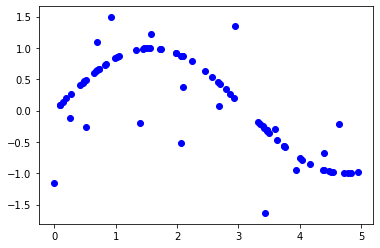

In [76]:

plt.scatter(X,y,color='Blue')

plt.show()

In [82]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X, y)   

RandomForestRegressor(random_state=0)

In [83]:
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values 

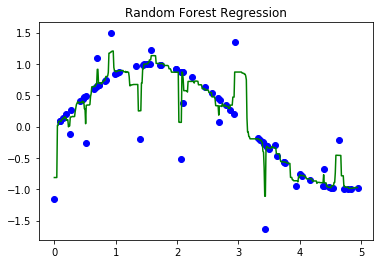

In [87]:
X_grid = np.arange(min(X), max(X), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(X, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 

plt.show()

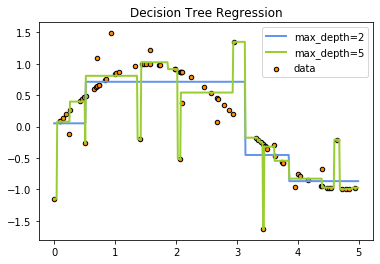

In [88]:
#Decision tree regressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.title("Decision Tree Regression")
plt.legend()
plt.show()

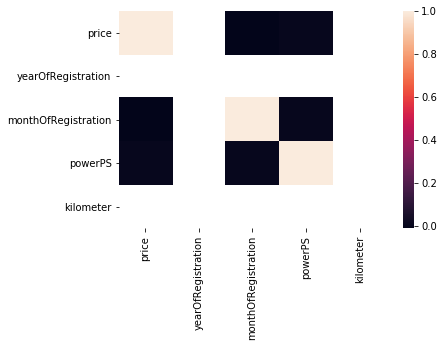

In [89]:
sns.heatmap(df.corr())

In [162]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

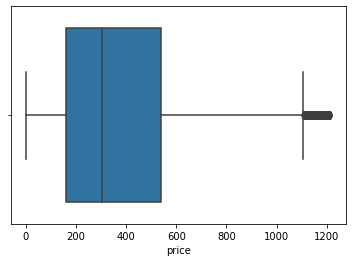

In [46]:
# Box plot 
import seaborn as sns
sns.boxplot(x=df['price'])

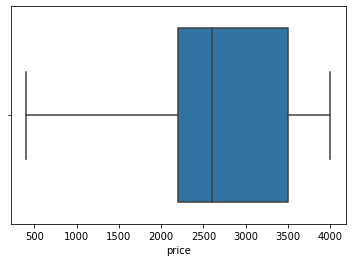

In [50]:
import seaborn as sns
sns.boxplot(x=df1['price'])

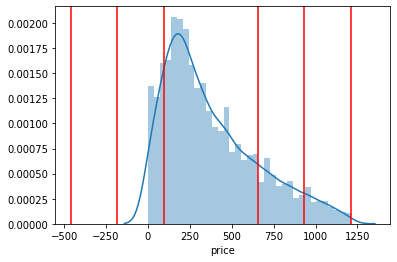

In [51]:
#Z score
x = df['price']
fig, ax = plt.subplots()
ax = sns.distplot(x)
ax.axvline(x.mean() - x.std(), color='r')
ax.axvline(x.mean() + x.std(), color='r')

ax.axvline(x.mean() - 2 * x.std(), color='r')
ax.axvline(x.mean() + 2 * x.std(), color='r')

ax.axvline(x.mean() - 3 * x.std(), color='r')
ax.axvline(x.mean() + 3 * x.std(), color='r')


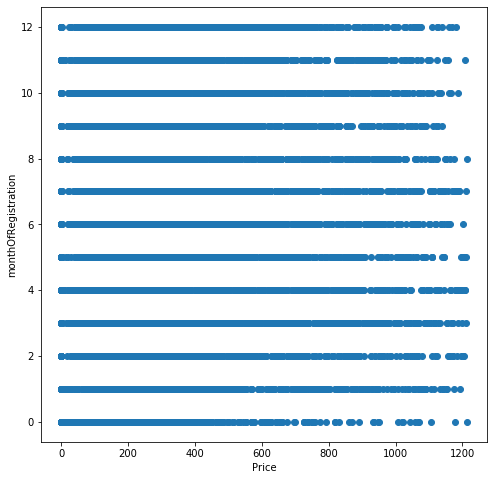

In [52]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df['price'], df['monthOfRegistration'])
ax.set_xlabel('Price')
ax.set_ylabel('monthOfRegistration')
plt.show()

In [53]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)

[[1.71866761 1.40693001 0.9969278  ...        nan        nan        nan]
 [0.77099108 0.57932412 1.21846731 ...        nan        nan        nan]
 [0.27305934 0.16552118 1.21846731 ...        nan        nan        nan]
 [1.17254893 1.4896906  0.72000341 ...        nan        nan        nan]
 [0.04818694 0.66208471 0.72000341 ...        nan        nan        nan]]


C:\Users\Simran\anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


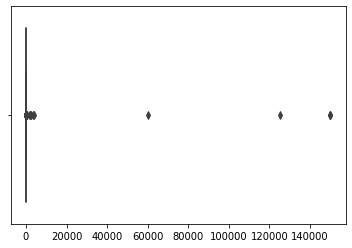

In [54]:
import seaborn as sns
sns.boxplot(x=df1)

In [55]:
print(z[0][1])


1.4069300106240161


In [56]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int32), array([], dtype=int32))


C:\Users\Simran\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [57]:
# Inter Quartile
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                                                                6100.0
yearOfRegistration                                                      9.0
monthOfRegistration                                                     6.0
powerPS                                                                81.0
kilometer                                                           50000.0
                                                                     ...   
name_zafira_2.0_dti                                                     0.0
name_zu_Verkaufen_Skoda_Fabia_Kombi_1_4l_16v                            0.0
name_zuverlaessigen_Skoda_Oktavia__Erste_Hand!                          0.0
name_zuverlaessiger_Ford_Focus_Turnier_Futura_Kombi_1.8_l               0.0
name_zuverlaessiges_Anfaengerauto_mit_Automatic_und_Standheizung        0.0
Length: 9110, dtype: float64


In [58]:
print(data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))


      price  yearOfRegistration  monthOfRegistration  powerPS  kilometer  \
0     False               False                False    False      False   
1     False               False                False    False      False   
2     False               False                False    False      False   
3     False               False                False    False      False   
4     False               False                False    False      False   
...     ...                 ...                  ...      ...        ...   
9995  False               False                False    False      False   
9996  False               False                False    False      False   
9997  False               False                False    False      False   
9998  False               False                False    False      False   
9999  False               False                False    False      False   

      model_145  model_147  model_156  model_159  model_1_reihe  ...  \
0         False

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [59]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)

[[1.71866761 1.40693001 0.9969278  ...        nan        nan        nan]
 [0.77099108 0.57932412 1.21846731 ...        nan        nan        nan]
 [0.27305934 0.16552118 1.21846731 ...        nan        nan        nan]
 [1.17254893 1.4896906  0.72000341 ...        nan        nan        nan]
 [0.04818694 0.66208471 0.72000341 ...        nan        nan        nan]]


C:\Users\Simran\anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [64]:
df1 = df1[(z < 3).all(axis=1)]

In [65]:
data1 = data1 [~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data1.shape

(0, 9110)

In [257]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variablesa

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def variance_inflation_factors(X, clf):
    vifs = []

    for i in range(X.shape[1]):
        sub_X = np.delete(X, i, axis=1)
        sub_y = X[:, i][np.newaxis].T
        sub_clf = clf.fit(sub_X, sub_y)
        sub_y_pred = clf.predict(sub_X)
        
        sub_r2 = r2_score(sub_y, sub_y_pred)
        
        vif = 1 / (1 - sub_r2)
        vifs.append(vif)
        
    return vifs

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

np.random.seed(42)
X = (np.array(sorted(list(range(5))*20)).reshape(20, 5) +
     np.random.normal(size=100, scale=0.5).reshape(20, 5))
y = (np.array(sorted(list(range(5))*20)).reshape(20, 5) +
     np.random.normal(size=100, scale=0.5).reshape(20, 5))

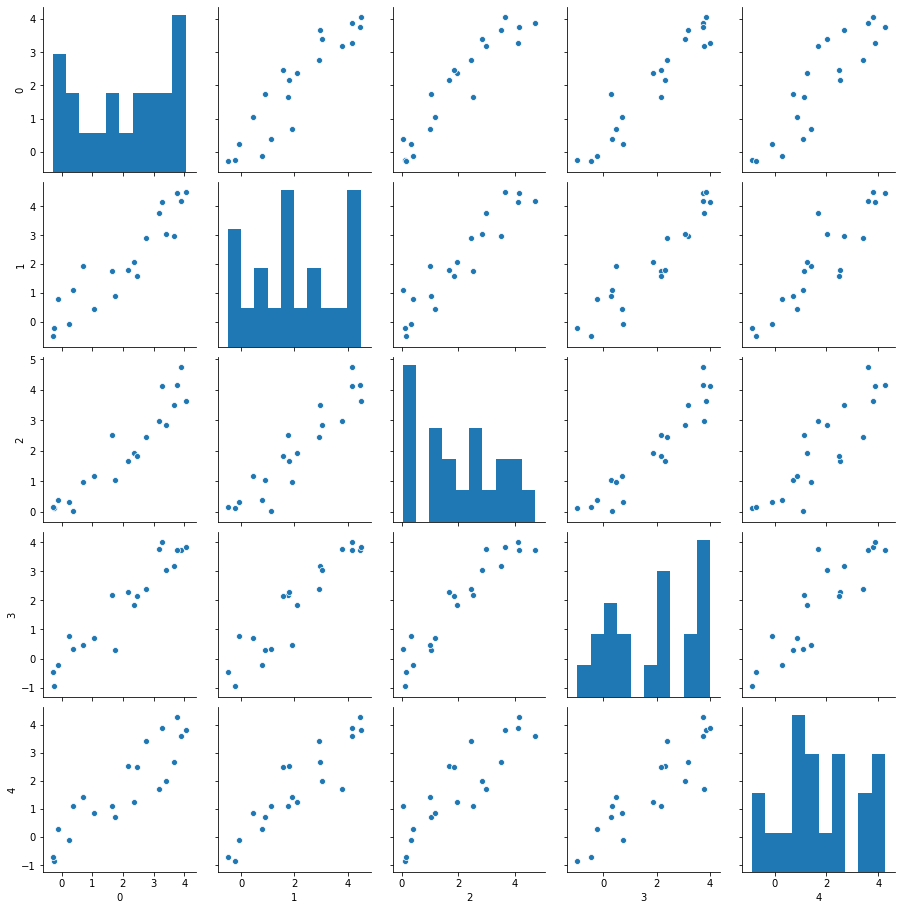

In [73]:
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(X))

In [74]:
variance_inflation_factors(X, clf)

[13.430428486704523,
 12.128619612849752,
 12.87736122592991,
 15.229125834251404,
 6.562558251862879]

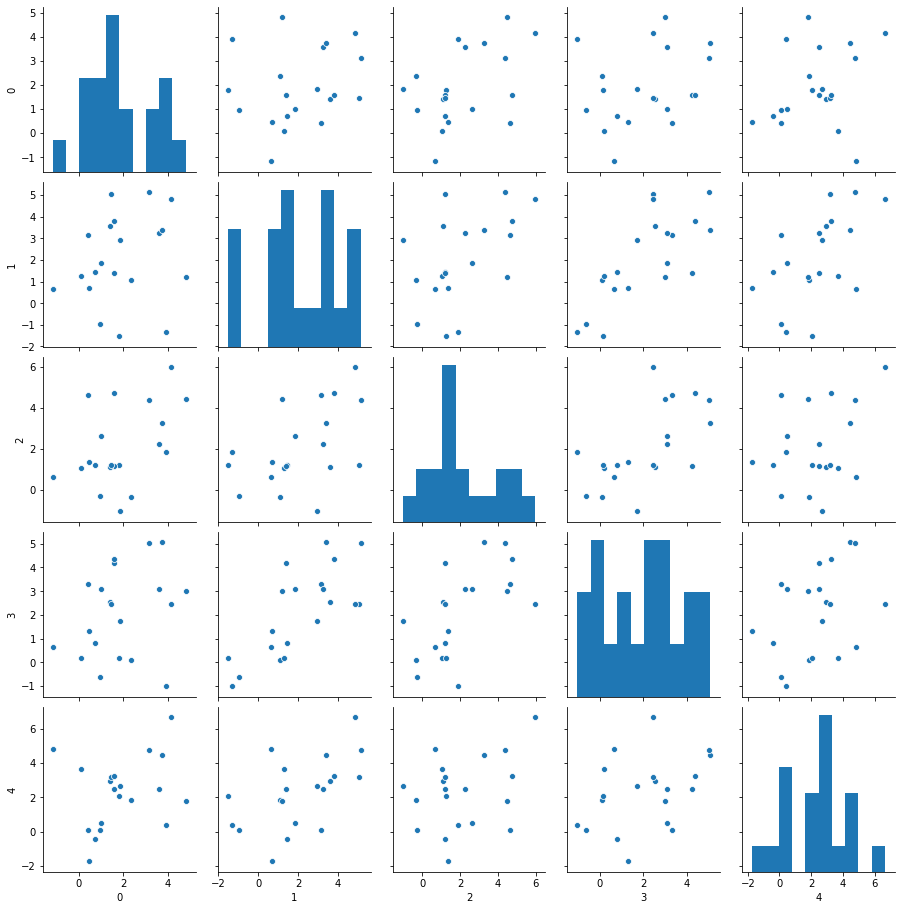

In [75]:
X = (np.array(sorted(list(range(5))*20)).reshape(20, 5) +
     np.random.normal(size=100, scale=1.25).reshape(20, 5))
y = (np.array(sorted(list(range(5))*20)).reshape(20, 5) +
     np.random.normal(size=100, scale=1.25).reshape(20, 5))
sns.pairplot(pd.DataFrame(X))

In [76]:
variance_inflation_factors(X, clf)

[1.3132869386837356,
 2.823049803536859,
 1.8794000479752782,
 2.7724898259846644,
 1.5081551502923802]